EDA 3--> Amazon data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "amazon.csv"
df = pd.read_csv(file_path)

# Display basic info
df.info()
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [2]:
# 1. Check for missing values
missing_values = df.isnull().sum()
print("1. Missing Values:\n", missing_values)

1. Missing Values:
 product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


In [3]:
# 2. Unique categories
unique_categories = df["category"].nunique()
print("2. Unique Categories:", unique_categories)

2. Unique Categories: 211


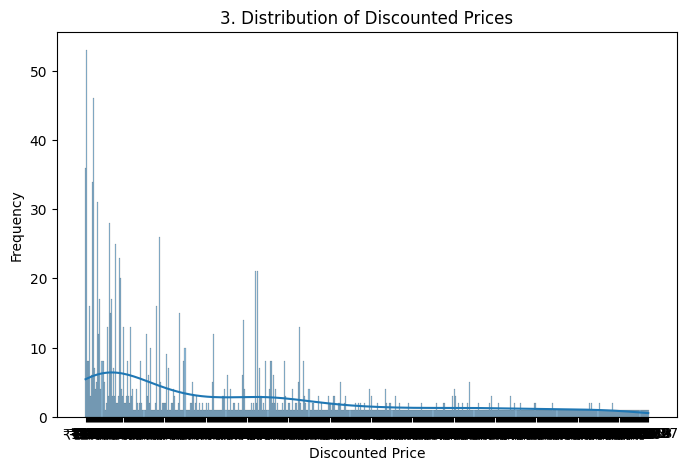

In [4]:
# 3. Distribution of discounted price
plt.figure(figsize=(8, 5))
sns.histplot(df["discounted_price"].dropna(), bins=30, kde=True)
plt.title("3. Distribution of Discounted Prices")
plt.xlabel("Discounted Price")
plt.ylabel("Frequency")
plt.show()


In [5]:
# 4. Top 10 most reviewed products
df["rating_count"] = pd.to_numeric(df["rating_count"], errors="coerce")  # Convert to numeric, setting errors to NaN
top_reviewed_products = df.groupby("product_name")["rating_count"].sum().sort_values(ascending=False).head(10)
print("4. Top 10 Most Reviewed Products:\n", top_reviewed_products)

4. Top 10 Most Reviewed Products:
 product_name
Duracell USB Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black                                            2445.0
Zoul USB C 60W Fast Charging 3A 6ft/2M Long Type C Nylon Braided Data Cable Quick Charger Cable QC 3.0 for Samsung Galaxy M31S M30 S10 S9 S20 Plus, Note 10 9 8, A20e A40 A50 A70 (2M, Grey)          1948.0
Ambrane 2 in 1 Type-C & Micro USB Cable with 60W / 3A Fast Charging, 480 mbps High Data, PD Technology & Quick Charge 3.0, Compatible with All Type-C & Micro USB Devices (ABDC-10, Black)            1806.0
Wecool Unbreakable 3 in 1 Charging Cable with 3A Speed, Fast Charging Multi Purpose Cable 1.25 Mtr Long, Type C cable, Micro Usb Cable and Cable for iPhone, White                                    1312.0
Sounce 65W OnePlus Dash Warp Charge Cable, 6.5A Type-C to USB C PD Data Sync Fast Charging Cable Compatible with One Plus 8T/ 9/ 9R/

In [6]:
# 5. Average rating per category
df["rating"] = pd.to_numeric(df["rating"], errors='coerce')
avg_rating_per_category = df.groupby("category")["rating"].mean().sort_values(ascending=False)
print("5. Average Rating per Category:\n", avg_rating_per_category)


5. Average Rating per Category:
 category
Computers&Accessories|Tablets                                                                                    4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters                                         4.5
Electronics|Cameras&Photography|Accessories|Film                                                                 4.5
Computers&Accessories|Components|Memory                                                                          4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                                                     4.5
                                                                                                                ... 
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                               3.6
Electronics|HomeTheater,TV&Video|Accessories|3DGlasses                                                           3.5
Computers&Accessories|

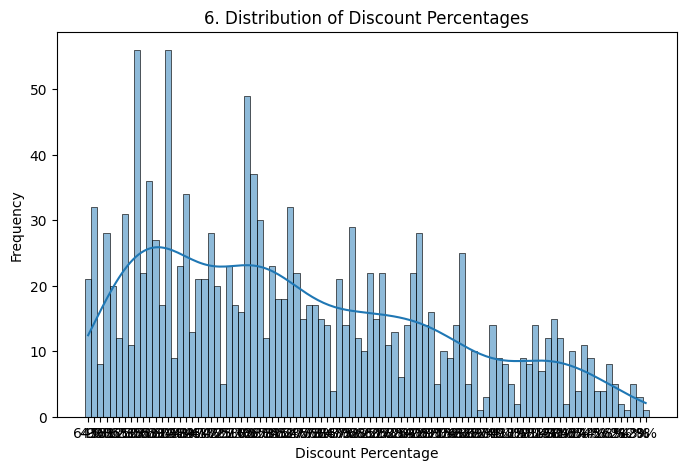

In [7]:
# 6. Discount percentage distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["discount_percentage"].dropna(), bins=30, kde=True)
plt.title("6. Distribution of Discount Percentages")
plt.xlabel("Discount Percentage")
plt.ylabel("Frequency")
plt.show()

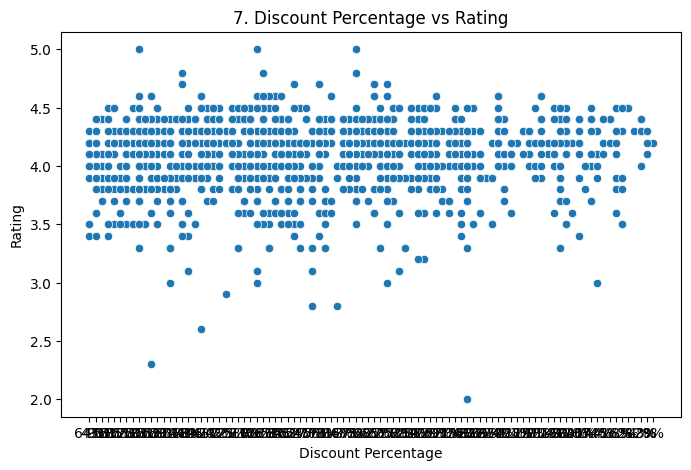

In [8]:
# 7. Relationship between discount percentage and rating
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["discount_percentage"], y=df["rating"])
plt.title("7. Discount Percentage vs Rating")
plt.xlabel("Discount Percentage")
plt.ylabel("Rating")
plt.show()


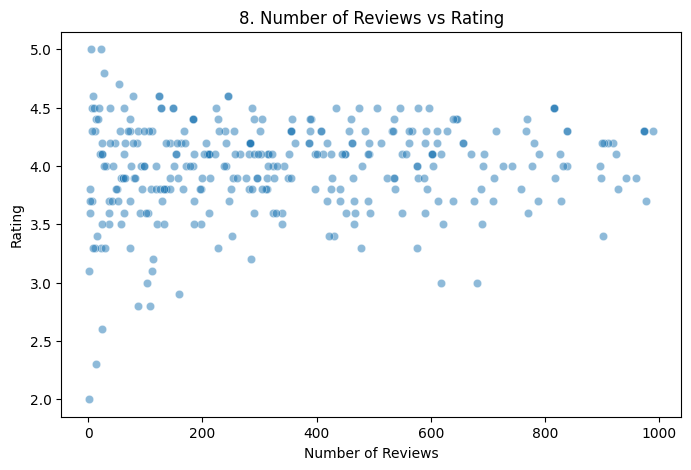

In [9]:
# 8. Number of reviews vs rating
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["rating_count"], y=df["rating"], alpha=0.5)
plt.title("8. Number of Reviews vs Rating")
plt.xlabel("Number of Reviews")
plt.ylabel("Rating")
plt.show()

In [10]:
# 9. Top 5 users who wrote the most reviews
top_reviewers = df["user_name"].value_counts().head(5)
print("9. Top 5 Users with Most Reviews:\n", top_reviewers)

9. Top 5 Users with Most Reviews:
 user_name
$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger Planet,Justice ⚖️,indrajyoti d.,Aditya Kumar,E.C.GEORGE               10
Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jaspreet singh,Khaja moin,Anand,S.ARUMUGAM                                8
Satheesh Kadiam,Pritom Chakraborty,Vishwa,Simranpreet Singh,Saptarshi,Amazon Customer,D.RAGHUL,Dharmendra kumar     8
ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Placeholder,BharanI,sonia,Niam                                            7
Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh chouhan,Ravi Siddan,Himanshu Goel,Udaykumar                           7
Name: count, dtype: int64
